In [1]:
import pandas as pd
import numpy as np

In [4]:
path='https://raw.githubusercontent.com/pranavkotak8/Datasets/master/corral.csv'
df1=pd.read_csv(path)

In [5]:
df1

,A0,A1,B0,B1,Irrelevant,Correlated,class
0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,1,0,0
4,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...
155,1,1,1,0,1,1,1
156,1,1,1,1,0,0,1
157,1,1,1,1,0,1,1
158,1,1,1,1,1,0,1


In [6]:
# Finding the Missing Values
df1.isna().sum()/len(df1)

A0            0.0
A1            0.0
B0            0.0
B1            0.0
Irrelevant    0.0
Correlated    0.0
class         0.0
dtype: float64

In [26]:
df1.describe()

,A0,A1,B0,B1,Irrelevant,Correlated,class
count,160.00000,160.00000,160.00000,160.00000,160.00000,160.000000,160.000000
mean,0.50000,0.50000,0.50000,0.50000,0.50000,0.462500,0.437500
std,0.50157,0.50157,0.50157,0.50157,0.50157,0.500157,0.497636
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000
25%,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000
50%,0.50000,0.50000,0.50000,0.50000,0.50000,0.000000,0.000000
75%,1.00000,1.00000,1.00000,1.00000,1.00000,1.000000,1.000000
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.000000,1.000000


In [7]:

df1.info()  # No null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   A0          160 non-null    int64
 1   A1          160 non-null    int64
 2   B0          160 non-null    int64
 3   B1          160 non-null    int64
 4   Irrelevant  160 non-null    int64
 5   Correlated  160 non-null    int64
 6   class       160 non-null    int64
dtypes: int64(7)
memory usage: 8.9 KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


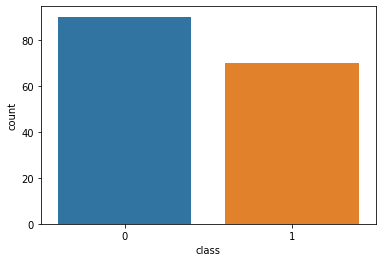

In [8]:
# Lets check out the Target Column
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(df1['class'])
plt.show()

In [9]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logistic=linear_model.LogisticRegression()
sgd=linear_model.SGDClassifier()

In [12]:
target1=df1['class']

In [13]:
# Splitting into trainset and testset in the ratio 80:20
seed=8
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1,target1,test_size=0.2,random_state=seed)

In [14]:

from sklearn.model_selection import cross_val_score
scores=cross_val_score(logistic,X_train,y_train,cv=5,scoring='accuracy')

In [15]:
np.mean(scores)

1.0

In [16]:
scores_sgd=cross_val_score(sgd,X_train,y_train,cv=5,scoring='accuracy')

In [17]:
np.mean(scores_sgd)

1.0

In [21]:
#Logistic Regression
logistic.fit(X_train,y_train)
y_test_pred_lr = logistic.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred_lr)
print("Accuracy:"+str(accuracy_test))

Accuracy:1.0


In [22]:
# SGD Classifier
sgd.fit(X_train,y_train)
y_test_pred_sgd = sgd.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred_sgd)
print("Accuracy:"+str(accuracy_test))

Accuracy:1.0


In [18]:
# Performing Random Forest on the Dataset
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
from sklearn.metrics import accuracy_score
y_test_pred_rf = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy:"+str(accuracy_test))

Accuracy:1.0


In [24]:
# Performing Decision Tree Classifier on the Dataset
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
from sklearn.metrics import accuracy_score
y_test_pred_rf = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy:"+str(accuracy_test))

Accuracy:1.0
